# Практическая работа №1: Краевая задача для уравнения II порядка.

Выполнил студент гр. 9381 Птичкин Сергей, вариант 12.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения
 
 Обыкновенные дифференциальные уравнения (ОДУ) — это уравнения, зависящие от одной независимой переменной, имеющие вид
 
 $$ f(x, y, y', y'', \dots, y^{(n)}) = 0, $$ где $x$ - независимая переменная.
 
 Общим решением ОДУ является множество таких функций $y$, что $ f(x, y, y', y'', \dots, y^{(n)}) = 0 $ для $\forall{x}$.
 
 Задача Коши подразумевает поиск частного решения из числа общих, удовлетворяющих некоторым условиям. Общий вид задачи Коши:
 
 \begin{cases}
     f(x, y, y', y'', \dots, y^{(n)}) = 0 \\
     y(x_0) = y_0 \\
     y'(x_0) = y_1 \\
     y''(x_0) = y_2 \\
     \dots \\
     y^{(n-1)}(x_0) = y_{n-1}
 \end{cases}

## Постановка задачи
 
 Дано дифференциальное уравнение:
 
 $$ y'' = f(x, y), \;\; a < x < b \;\; (1) $$
 
 и граничные условия
 
 $$ y(a) = y_a \;\; y(b) = y_b \;\; (2) $$
 
 Требуется найти решение задачи $(1)$ - $(2)$ и построить его график.
 
 
 Рассмотрим задачу Коши для уравнения $(1)$ с начальными условиями
 
 $$ y(a) = y_a \;\; y'(a) = h \;\; (3) $$
 
 План решения основан на многократном решении задачи Коши $(1)$, $(3)$.
 Значение решения задачи Коши при $x = b$ является функцией от $h$.
 Задача сводится к отысканию такого значения переменной $h$, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться
 
 $$ y(b, h) = y_b \;\; (4) $$
 
 Это уравнение с одним неизвестным $h$. Для его решения можно применить стандартный метод половинного
 деления.

## Схема решения
 
 1. Задаем наугад число $h_0$, решаем задачу Коши. Далее вычисляем $y(b, h_0)$.
 Если оказалось, что $y(b, h_0) = y_b$, то мы решили краевую задачу. Если же нет, то переходим на следующий шаг.
 
 
 2. Пусть, например, $y(b, h_0) > y_b$. Выберем шаг $\Delta{h}$ и решаем несколько раз задачу Коши при $h_1 = h_0 + \Delta{h}$.
 Если снова получили $y(b, h_1) > y_b$, причём $y(b, h_0) > y(b, h_1) > y_b$, решаем задачу Коши при $h_2 = h_1 + \Delta{h}$ и т.д.
 Процесс повторяется пока не получим неравенство $y(b, h_m) < y_b$.
 Это означает, что искомое значение попало в «вилку», т.е. $h \in (h_{m−1}; h_m)$.
 Шаг $\Delta{h}$ не должен быть слишком маленьким, иначе процесс сильно затянется.
 Знак шага также не известен заранее, может оказаться, что нужно не увеличивать наклон, а уменьшать.
 
 
 3. Далее применяется стандартный процесс половинного деления к уравнению (4).
 
 
 4. Процесс останавливаем, когда выполнится неравенство $|y(b, h_m) − y(b, h_{m−1})| < 0.001$.
 
 
 5. Возможен случай, когда ни одна интегральная кривая не проходит через точку $(b, y_b)$, т.е. задача не имеет решения.
 Поэтому нужно ограничить число шагов. Процесс останавливается при $m > M$, где $M$ – заданное число (например, 100).

## Выполнение работы

### Вариант 12
 
 $ a = 0, \;\; b = 2, \;\; y_a = 4, \;\; y_b = 1 $
 
 $ y'' = f(x, y) = {y \over {x^2  +1}} $
 
 Сведем задачу к следующей системе:

 $\begin{cases}
     y'' = f(x, y) = {y \over {x^2  +1}} \\
     y(a) = y_a \\
     y'(a) = h \\
 \end{cases}$
 
 $ y' = g(x, y) $
 
 $\begin{cases}
     y' = g(x, y) \\
     g' = f(x, y) = {y \over {x^2  +1}} \\
     y(a) = y_a \\
     y'(a) = h \\
 \end{cases}$
 
 Решим задачу Коши для начальной точки h = 0:

In [103]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import math

a = 0
b = 2
y_a = 4
y_b = 1
h = 0

def func(x, y):
    return y/(x**2 + 1)

def dif_sys(x, val):
    y_x, dy_x = val
    dy = dy_x
    ddy = func(x, y_x)
    return dy, ddy

n = 100
X = np.linspace(a, b, n)
res = solve_ivp(dif_sys, (a, b), (y_a, h), t_eval=X)
Y = res.y[0]
y_bh = Y[-1]
print("y(b,h) = ", y_bh)

y(b,h) =  10.738146717931073


$y(b, h) > y(b)$, задача не решена, значит берём отрицательный шаг dh и решаем задачу Коши, пока $y(b,h)$ не станет меньше $y(b)$:

In [104]:
dh = -1

while y_b < y_bh:
    h += dh
    res = solve_ivp(dif_sys, (a, b), (y_a, h), t_eval=X)
    Y = res.y[0]
    y_bh = Y[-1]

print("h принадлежит [", h, "; ", h-dh, "]")

h принадлежит [ -4 ;  -3 ]


Методом половинного деления найдём $ h $, такой что $|y(b, h_{m}) - y(b, h_{m-1})| < 0.001$:

In [105]:
steps = 100
h_l = h
h_r = h-dh

res_l = solve_ivp(dif_sys, (a, b), (y_a, h_l), t_eval=X)
res_r = solve_ivp(dif_sys, (a, b), (y_a, h_r), t_eval=X)

for step in range(steps):
    h_mid = h_l + abs(h_r - h_l) / 2
    res_mid = solve_ivp(dif_sys, (a, b), (y_a, h_mid), t_eval=X)
    y_bh = res_mid.y[0][-1]

    if y_bh > y_b:
        h_r = h_mid
        res_r = res_mid
    else:
        h_l = h_mid
        res_l = res_mid
    
    if abs(res_l.y[0][-1] - res_r.y[0][-1]) < 0.001:
        break
print("h = ", h_l)
print("f(b,h) = ", res_l.y[0][-1])

h =  -3.482421875
f(b,h) =  0.9996563136104004


Построим график полученного решения:

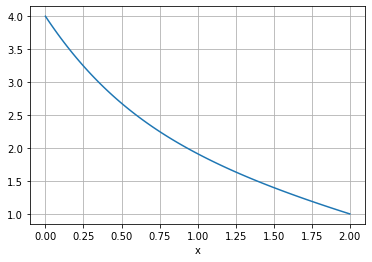

In [106]:
Y = res_l.y[0]
plt.plot(X, Y)
plt.xlabel("x")
plt.grid(True)

## Выводы

Таким образом, была решена краевая задача II-го порядка путём многократного решения задачи Коши. 

Полученные результаты: 

$h = -3.482421875$

$f(b, h) = 0.9996563136104004$